In [4]:
# Apriori algorithm
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
file_path = "D:/BMSCE/2nd sem/Machine Learning/ML Lab/Online_Retail.csv"
data = pd.read_csv(file_path)
print("Original Dataset:\n", data.head())
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[data['Quantity'] > 0]
basket = (data[data['Country'] == "United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

print("\nProcessed Basket (Before Encoding):\n", basket.head())
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POST', inplace=True, axis=1, errors='ignore')
print("\nProcessed Basket (After Encoding):\n", basket_sets.head())
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
print("\nFrequent Itemsets:\n",frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAssociation Rules:\n",rules)


Original Dataset:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Processed Basket (Before Encoding):
 Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                      

C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Frequent Itemsets:
      support                              itemsets
0   0.051116           (ALARM CLOCK BAKELIKE RED )
1   0.075355       (ASSORTED COLOUR BIRD ORNAMENT)
2   0.051336     (GREEN REGENCY TEACUP AND SAUCER)
3   0.050291               (HEART OF WICKER LARGE)
4   0.063977               (HEART OF WICKER SMALL)
5   0.055403              (JAM MAKING SET PRINTED)
6   0.054908            (JAM MAKING SET WITH JARS)
7   0.050016      (JUMBO  BAG BAROQUE BLACK WHITE)
8   0.063702             (JUMBO BAG PINK POLKADOT)
9   0.106519             (JUMBO BAG RED RETROSPOT)
10  0.062273   (JUMBO SHOPPER VINTAGE RED PAISLEY)
11  0.062108              (JUMBO STORAGE BAG SUKI)
12  0.066835             (LUNCH BAG  BLACK SKULL.)
13  0.050291              (LUNCH BAG APPLE DESIGN)
14  0.058536                 (LUNCH BAG CARS BLUE)
15  0.055293             (LUNCH BAG PINK POLKADOT)
16  0.076509             (LUNCH BAG RED RETROSPOT)
17  0.057052          (LUNCH BAG SPACEBOY DESIGN )
18  0.0561

   Income_bin  Score_bin
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         1.0        0.0

 *******FP growth*******

   support             itemsets
0    0.250           (Income_0)
1    0.230            (Score_0)
2    0.315           (Income_1)
3    0.100           (Income_4)
4    0.125           (Income_3)
5    0.210           (Income_2)
6    0.330            (Score_1)
7    0.330            (Score_2)
8    0.135  (Score_2, Income_1)


C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


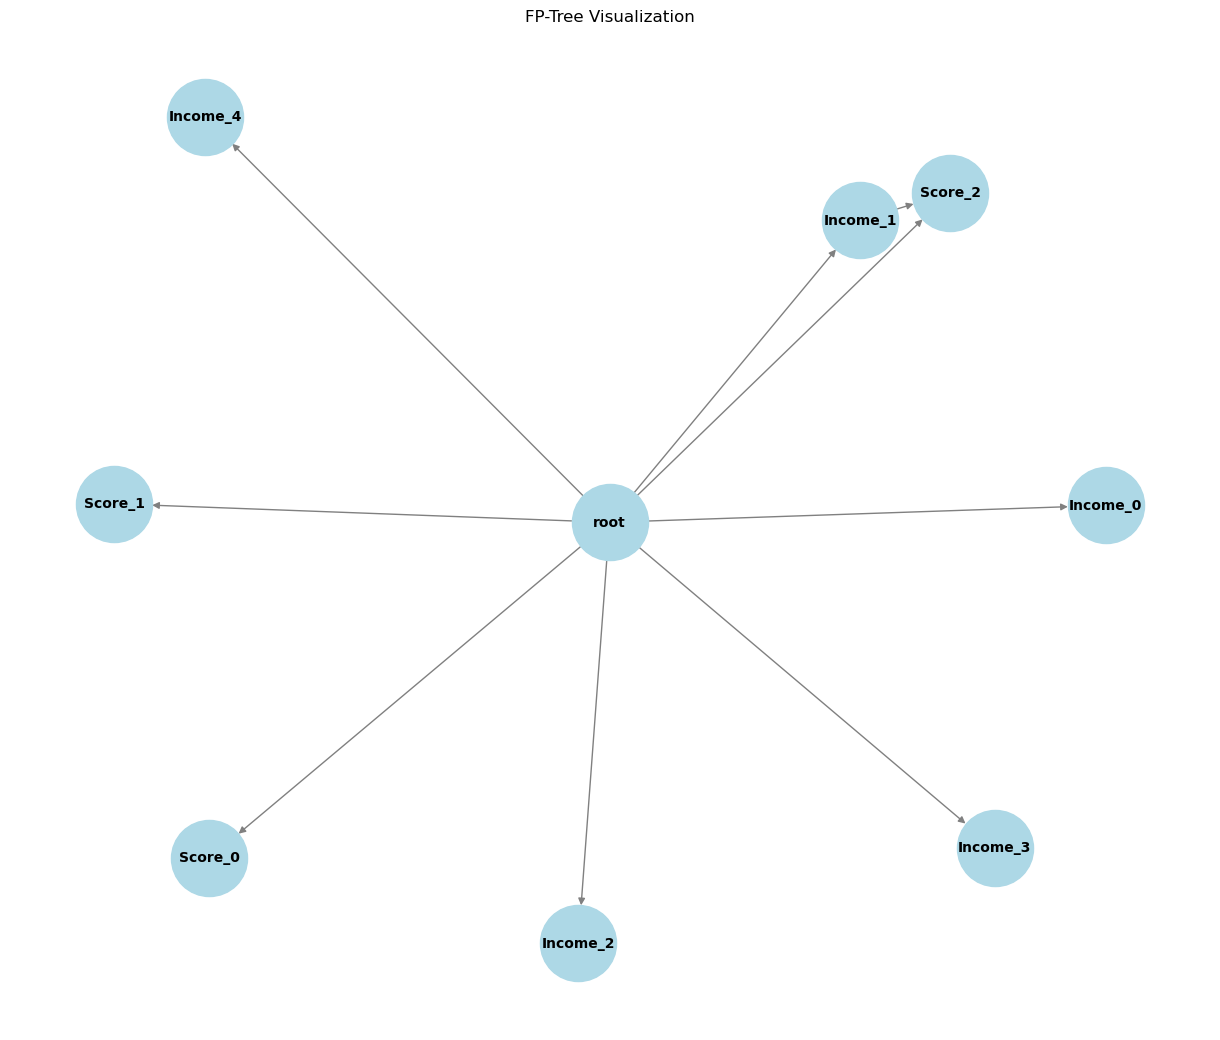

In [6]:
#FP Tree
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import KBinsDiscretizer
df = pd.read_csv("D:/BMSCE/2nd sem/Machine Learning/ML Lab/Mall_Customers.csv")
x = df.iloc[:, [2, 3]].values 
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
x_binned = kbins.fit_transform(x)
df_binned = pd.DataFrame(x_binned, columns=['Income_bin', 'Score_bin'])
print(df_binned.head())
transactions = df_binned.apply(lambda row: [f'Income_{int(row["Income_bin"])}', f'Score_{int(row["Score_bin"])}'], axis=1).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)
print("\n *******FP growth*******\n")
print(frequent_itemsets)
def construct_fp_tree(itemsets):
    tree = {}
    for itemset in itemsets['itemsets']:
        current_level = tree
        for item in sorted(itemset):
            if item not in current_level:
                current_level[item] = {}
            current_level = current_level[item]
    return tree
fp_tree = construct_fp_tree(frequent_itemsets)
def add_edges(graph, parent, children):
    for child, sub_children in children.items():
        graph.add_edge(parent, child)
        add_edges(graph, child, sub_children)
G = nx.DiGraph()
add_edges(G, 'root', fp_tree)
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('FP-Tree Visualization')
plt.show()

C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


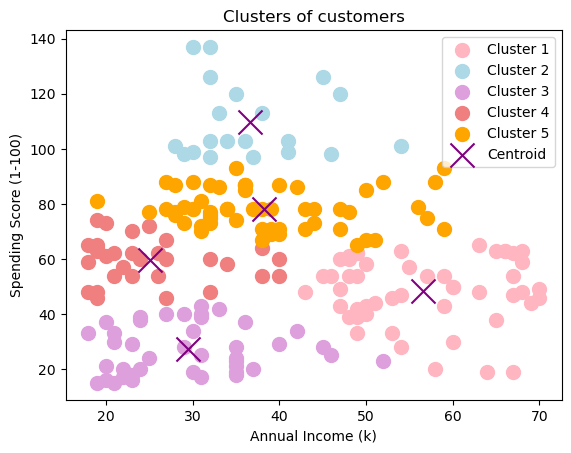

In [2]:
# K-means
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("D:/BMSCE/2nd sem/Machine Learning/ML Lab/Mall_Customers.csv")
x = df.iloc[:, [2, 3]].values 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)      
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'lightpink', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'lightblue', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'plum', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'lightcoral', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'Orange', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'purple', label = 'Centroid',marker="x")   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  


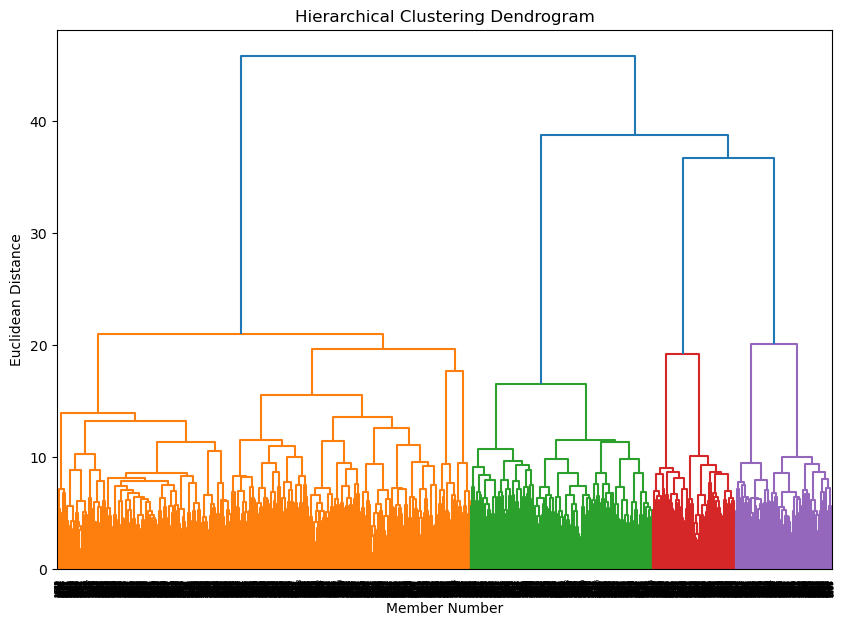

C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster Assignments:
      Member_number  Cluster
0              1808        1
1              2552        0
2              2300        1
3              1187        2
4              3037        1
...             ...      ...
3893           4590        2
3894           4703        4
3895           3607        2
3896           4587        0
3897           2417        3

[3898 rows x 2 columns]


In [3]:
# Hierarchial Clustering
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

df = pd.read_csv("D:/BMSCE/2nd sem/Machine Learning/ML Lab/Groceries_dataset (Apriori).csv")

df['itemDescription'] = df['itemDescription'].apply(lambda x: x.split('/'))
df = df.explode('itemDescription')
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

distance_matrix = pairwise_distances(df_encoded, metric='euclidean')
condensed_distance_matrix = squareform(distance_matrix)

linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Member Number')
plt.ylabel('Euclidean Distance')
plt.show()

num_clusters = 5
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
clusters = cluster_model.fit_predict(df_encoded)

df_clusters = pd.DataFrame({'Member_number': df['Member_number'].unique(), 'Cluster': clusters})
print("\nCluster Assignments:")
print(df_clusters)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


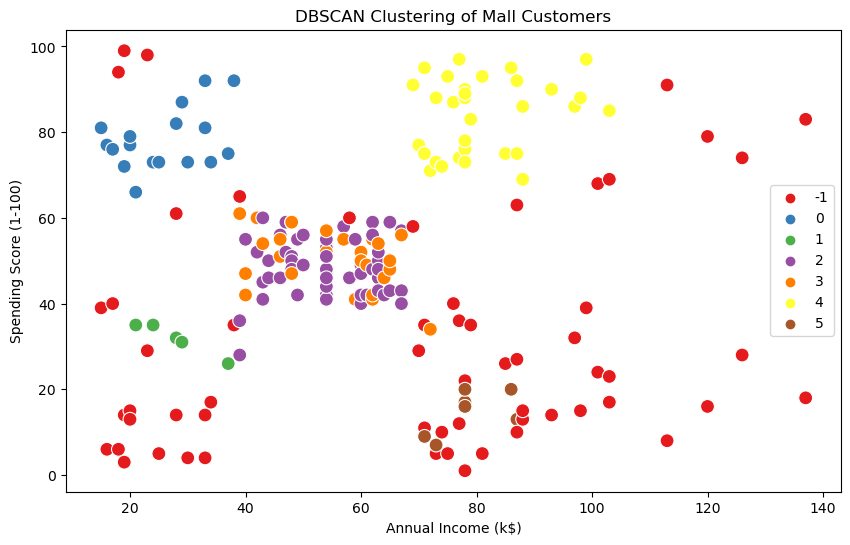

In [7]:
# DB Scan
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's a CSV file)
# You can adjust the file path as per your requirement
dataset = pd.read_csv("D:/BMSCE/2nd sem/Machine Learning/ML Lab/Mall_Customers.csv")

# Display the first few rows of the dataset
print(dataset.head())

# Preprocessing: Convert 'Gender' to numerical values (Male=0, Female=1)
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

# Selecting features for clustering (Age, Annual Income, Spending Score)
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features to bring them to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Getting the cluster labels
labels = dbscan.labels_

# Adding the cluster labels to the dataset
dataset['Cluster'] = labels

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')
plt.show()



Performance for K=1:
Accuracy: 0.6000
Confusion Matrix:
[[14 10]
 [14 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        24
           1       0.69      0.61      0.65        36

    accuracy                           0.60        60
   macro avg       0.59      0.60      0.59        60
weighted avg       0.61      0.60      0.60        60


Performance for K=2:
Accuracy: 0.5333
Confusion Matrix:
[[20  4]
 [24 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.83      0.59        24
           1       0.75      0.33      0.46        36

    accuracy                           0.53        60
   macro avg       0.60      0.58      0.52        60
weighted avg       0.63      0.53      0.51        60


Performance for K=3:
Accuracy: 0.5333
Confusion Matrix:
[[ 9 15]
 [13 23]]
Classification Report:
              precision    recall  f1-score   sup

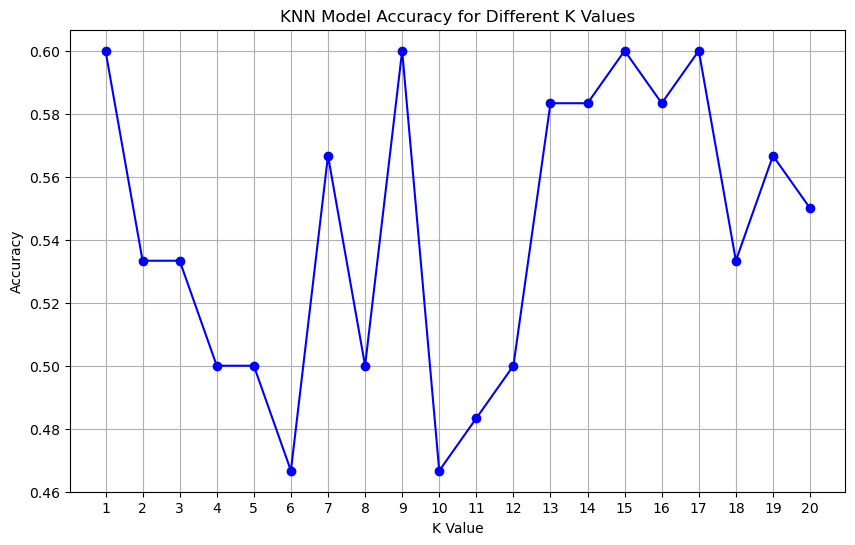

In [8]:
# KNN

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (assuming it's a CSV file)
dataset = pd.read_csv("D:/BMSCE/2nd sem/Machine Learning/ML Lab/Mall_Customers.csv")

# Preprocessing: Convert 'Gender' to numerical values (Male=0, Female=1)
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

# Select features (Age, Annual Income, Spending Score) and target (Gender)
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = dataset['Gender']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Analyze the model for different values of K
k_values = range(1, 21)  # We'll analyze for K from 1 to 20
accuracies = []

for k in k_values:
    # Initialize KNN with current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Display performance metrics for the current K
    print(f"\nPerformance for K={k}:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Visualizing the performance across different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Model Accuracy for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Accuracy: 0.0766

Classification Report:


C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Achal P Mayya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

           Australia       0.00      0.00      0.00       370
             Austria       0.00      0.00      0.00       116
             Bahrain       0.00      0.60      0.00         5
             Belgium       0.01      0.09      0.01       625
              Brazil       0.27      1.00      0.43         9
              Canada       0.00      0.00      0.00        44
     Channel Islands       0.00      0.00      0.00       230
              Cyprus       0.00      0.00      0.00       186
      Czech Republic       0.00      0.00      0.00         9
             Denmark       0.01      0.01      0.01       124
                EIRE       0.00      0.00      0.00      2322
  European Community       0.00      0.00      0.00        16
             Finland       0.00      0.00      0.00       213
              France       0.00      0.00      0.00      2525
             Germany       0.02      0.75      0.05      2785
       

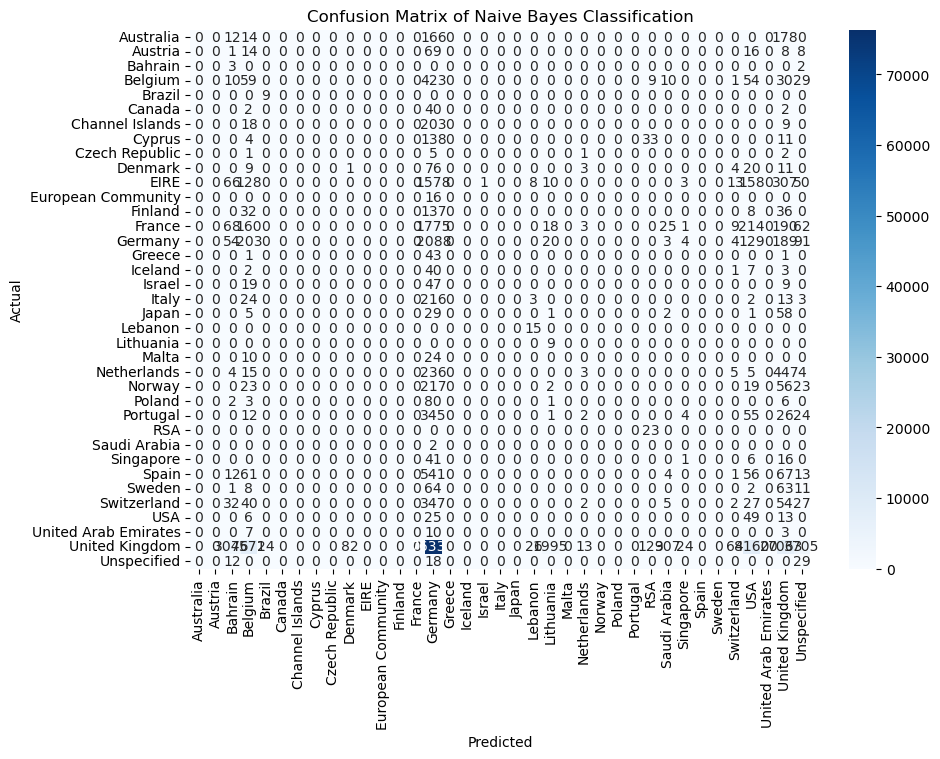

In [9]:
# Naive Bayes

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's a CSV file)
dataset = pd.read_csv("D:/BMSCE/2nd sem/Machine Learning/ML Lab/Online_Retail.csv", encoding='latin1')

# Display the first few rows of the dataset
print(dataset.head())

# Step 1: Data Preprocessing
# Dropping rows with missing CustomerID as we need it for classification
dataset = dataset.dropna(subset=['CustomerID'])

# Selecting features for classification
# Let's assume we are classifying based on the Country where the customer is from
# We'll use 'Quantity', 'UnitPrice', and 'InvoiceDate' features (with feature engineering)
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDay'] = dataset['InvoiceDate'].dt.day
dataset['InvoiceMonth'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceHour'] = dataset['InvoiceDate'].dt.hour

# Select relevant features and target (Country)
X = dataset[['Quantity', 'UnitPrice', 'InvoiceDay', 'InvoiceMonth', 'InvoiceHour']]
y = dataset['Country']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Applying Naive Bayes Classifier (GaussianNB for continuous features)
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Step 4: Analyzing Model Efficiency

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix of Naive Bayes Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
